# Robot task space capacity evaluation

<img src = "https://gitlab.inria.fr/auctus-team/people/antunskuric/pycapacity/-/raw/master/images/robot.png" height="200px">

In [1]:
import numpy as np

import pycapacity.robot as capacity # robot capacity module
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex, plot_ellipsoid, plot_polytope  # visualistion tools
import matplotlib.pyplot as plt
import matplotlib

## Four link planar robot example

Force polytope and ellipsoid example calculaton using the newly developed force capacity calculation python module

`n=4` and `m=2`

In [2]:
# jacobian function for four link planar robot
def four_link_jacobian(joints):
    sq1 = np.sin(joints[0])
    sq12 = np.sin(joints[0] + joints[1])
    sq123 = np.sin(joints[0] + joints[1] + joints[2])
    sq1234 = np.sin(joints[0] + joints[1] + joints[2] + joints[3])
    cq1 = np.cos(joints[0])
    cq12 = np.cos(joints[0] + joints[1])
    cq123 = np.cos(joints[0] + joints[1] + joints[2])
    cq1234 = np.cos(joints[0] + joints[1] + joints[2] + joints[3])
    return np.array([[0.5*cq1+0.5*cq12+0.5*cq123+0.3*cq1234, 0.5*cq12+0.5*cq123+0.3*cq1234, 0.5*cq123+0.7*cq1234, +0.3*cq1234], [-0.5*sq1-0.5*sq12-0.5*sq123-0.3*sq1234, -0.5*sq12-0.5*sq123-0.3*sq1234, -0.5*sq123-0.3*sq1234, -0.3*sq1234]])
# inertia matrix of a four link planar robot
def four_link_inertia(joints):
    sq1 = np.sin(joints[1])
    cq1 = np.cos(joints[1])
    sq2 = np.sin(joints[2])
    cq2 = np.cos(joints[2])
    sq3 = np.sin(joints[3])
    cq3 = np.cos(joints[3])
    return np.reshape([cq1*(5.0/8.0)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/8.0)+(cq2*cq3)/8.0-sq1*sq2*(3.0/8.0)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/8.0-(cq1*sq2*sq3)/8.0-(cq2*sq1*sq3)/8.0-(cq3*sq1*sq2)/8.0+7.0/8.0,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/8.0)+cq3/8.0+(cq2*cq3)/8.0-(sq2*sq3)/8.0+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/8.0+3.0/1.6e+1,cq3/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+1.0/3.2e+1,1.0/3.2e+1],[4,4]);

def four_link_forward_kinematics(joints):
    return four_link_joints_forward_kinematics(joints)[:,-1]

def four_link_joints_forward_kinematics(joints):
    L = [0, 0.5,0.5,0.5,0.3]
    x = np.zeros((2,1))
    for i in range(5):
        sq = np.sum(joints[:i])
        x = np.hstack((x, x[:,-1].reshape(2,1)+ L[i]*np.array([[np.sin(sq)], [np.cos(sq)]])));
    return x

def four_link_plot_robot(plt, q):
    robot_position = four_link_joints_forward_kinematics(q)
    plt.plot(robot_position[0,:],robot_position[1,:],linewidth=5, label="robot", marker='o', markerfacecolor='k', markersize=10)
    plt.plot(robot_position[0,0],robot_position[1,0]-0.08,'ks',markersize=20)

## Force polytope and manipulability ellipsoid

In [3]:
# joint positions q
q  = np.random.rand(4)*np.pi/3*2-1
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))

# jacobian
J = four_link_jacobian(q)
# calculate the velocity polytope
f_poly = capacity.force_polytope(J,tau_min,tau_max)

# calculate the velocity ellipsoid
f_ellipsoid = capacity.force_ellipsoid(J, tau_max)

Visual: no faces found, calculating faces


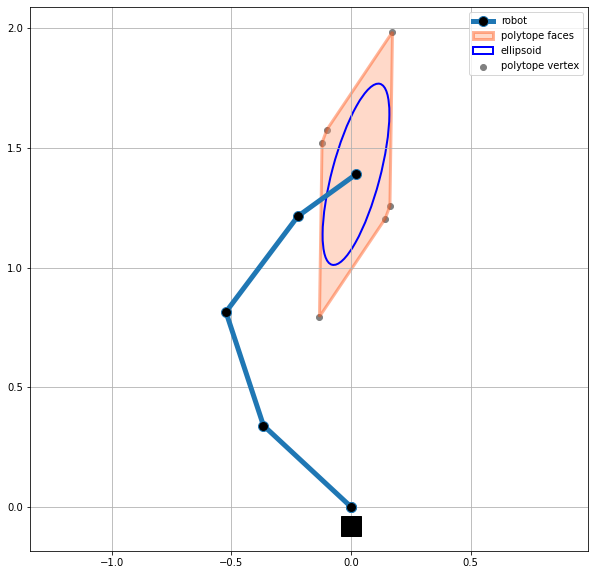

In [4]:
# visualise polytope ellipsoid
fig = plt.figure(12, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = four_link_forward_kinematics(q) 
four_link_plot_robot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
              polytope=f_poly,
              center=robot_position, 
              face_color='lightsalmon', 
              edge_color='orangered',
              vertex_color='gray',
              label='polytope', 
              scale=scale)

# plot ellipsoid
plot_ellipsoid(ellipsoid=f_ellipsoid, 
               center=robot_position, 
               plot=fig, 
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0,
               scale=scale)

plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

## Approximation of the robot's reachable space using a convex polytope

In [5]:

# joint torque limits tau
tau_min = -np.ones(4)*1
tau_max = np.ones(4)*1
# joint velocity limits
dq_min = -np.ones(4)
dq_max = np.ones(4)
# joint limits 
q_min = -np.ones(4)
q_max = np.ones(4)

# random joint configuration
q  = np.random.uniform(q_min, q_max)
# q = q_min
#q = np.array([0.63305469, 0.67642124, 1.1684918 , 0.22633345])

# jacobian
J = four_link_jacobian(q)
# jacobian
M = four_link_inertia(q)
# calculate the acceleration polytope
poly_dt1000 = capacity.reachable_space_approximation(J=J, 
                                                      M=M, 
                                                      q0=q, 
                                                      horizon=1,
                                                      t_max=tau_max,
                                                      t_min=tau_min, 
                                                      dq_max=dq_max,
                                                      dq_min=dq_min,
                                                      q_min = q_min,
                                                      q_max = q_max)

poly_dt500 = capacity.reachable_space_approximation(J=J, 
                                                  M=M, 
                                                  q0=q, 
                                                  horizon=0.5,
                                                  t_max=tau_max,
                                                  t_min=tau_min, 
                                                  dq_max=dq_max,
                                                  dq_min=dq_min,
                                                  q_min = q_min,
                                                  q_max = q_max)


Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


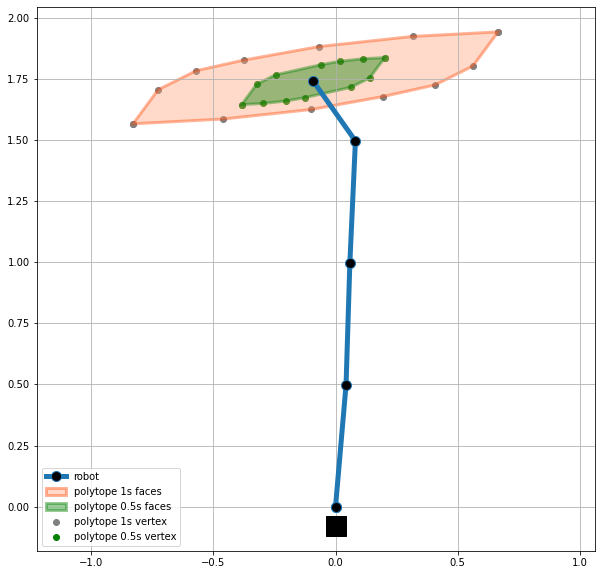

In [6]:
# visualise polytope ellipsoid
fig = plt.figure(12, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = four_link_forward_kinematics(q) 
four_link_plot_robot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
              polytope=poly_dt1000,
              center=robot_position, 
              face_color='lightsalmon', 
              edge_color='orangered',
              vertex_color='gray',
              label='polytope 1s')
plot_polytope(plot=fig,
              polytope=poly_dt500,
              center=robot_position, 
              face_color='green', 
              edge_color='green',
              vertex_color='green',
              label='polytope 0.5s')

plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

## Acceleration polytope and acceleration ellipsoid

In [7]:
##### joint positions q
q  = np.random.rand(4)*np.pi/2
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))


# jacobian
J = four_link_jacobian(q)
# jacobian
M = four_link_inertia(q)

# calculate the acceleration polytope

acc_poly = capacity.acceleration_polytope(J, M, tau_min ,tau_max)

# calculate the acceleration ellipsoid
acc_ellisoid= capacity.acceleration_ellipsoid(J, M, tau_max)

Visual: no faces found, calculating faces


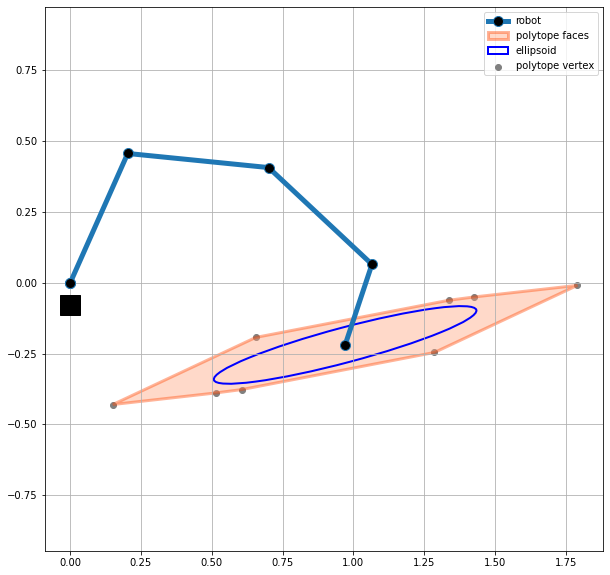

In [8]:
# visualise polytope ellipsoid
fig = plt.figure(13, figsize=[10,10])

scale = 1/100

#plot the robot
robot_position = four_link_forward_kinematics(q) 
four_link_plot_robot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
                    polytope=acc_poly,
                    center=robot_position, 
                    face_color='lightsalmon', 
                    edge_color='orangered',
                    vertex_color='gray',
                    label='polytope', 
                    scale=scale)
# plot ellipsoid
plot_ellipsoid(ellipsoid=acc_ellisoid, 
               center=robot_position, 
               plot=fig,
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0, 
               scale=scale)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

## Velocity polytope and manipulability ellipsoid

In [9]:
##### joint positions q
q  = np.random.rand(4)*np.pi/3*2-1
# joint torque limits tau
dq_min = -np.ones((4,1))
dq_max = np.ones((4,1))


# jacobian
J = four_link_jacobian(q)
# calculate the force polytope

vel_poly = capacity.velocity_polytope(J, dq_min ,dq_max)

# calculate the force ellipsoid
vel_ellipsoid = capacity.velocity_ellipsoid(J, dq_max)


Visual: no faces found, calculating faces


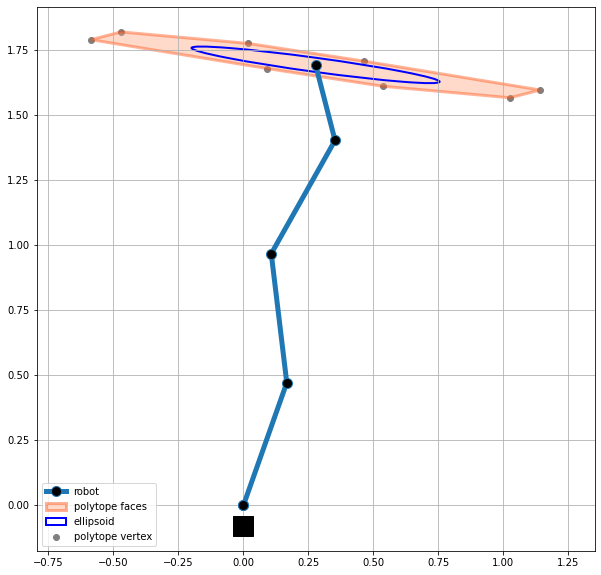

In [10]:
# visualise polytope ellipsoid
fig = plt.figure(13, figsize=[10,10])

scale = 1/5

#plot the robot
robot_position = four_link_forward_kinematics(q) 
four_link_plot_robot(plt, q)

#plot the polytope
plot_polytope(plot=fig,
                    polytope=vel_poly,
                    center=robot_position, 
                    face_color='lightsalmon', 
                    edge_color='orangered',
                    vertex_color='gray',
                    label='polytope', 
                    scale=scale)
# plot ellipsoid
plot_ellipsoid(ellipsoid=vel_ellipsoid, 
               center=robot_position, 
               plot=fig,
               label='ellipsoid', 
               edge_color='blue', 
               alpha=1.0, 
               scale=scale)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

## Generic 3D robot example
`m=3`
Define jacobian matrix and torque limits

In [11]:
m = 3 # 3d forces
n = 6 # robot dof 
J = np.array(np.random.rand(m,n))
# torque limits
t_min = -10*np.ones(n)
t_max = 10*np.ones(n)
# velocity limits
dq_min = -5*np.ones(n)
dq_max = 5*np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [12]:
f_poly = capacity.force_polytope(J,t_max,t_min)

Calculate the velocity polytope vertices
```
v = J dq
s.t. dq_min <  dq < dq_max
```

In [13]:
vel_poly = capacity.velocity_polytope(J,dq_max,dq_min)

Visualise the vertices force and velocity polytopes: `f_vert` and `vel_vert`

Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


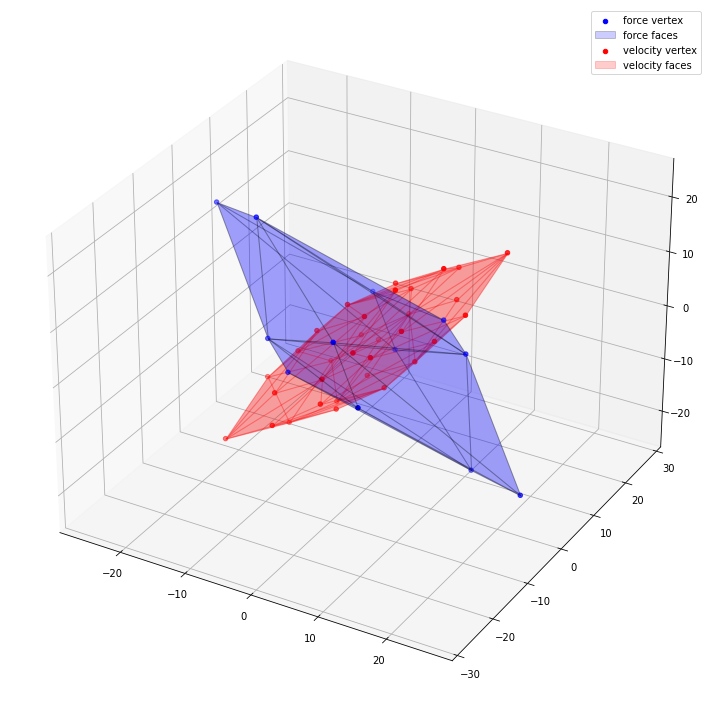

In [14]:
fig = plt.figure(1, figsize=[10,10])


# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='black',
               vertex_color='blue',
               label='force',
               alpha=0.2)
    
# plot polytope
plot_polytope(plot=fig,
               polytope=vel_poly, 
               face_color='red', 
               edge_color='red',
               vertex_color='red',
               label='velocity',
               alpha=0.2)

plt.tight_layout()
plt.legend()

# Force polytope vs force ellipsoid

Calculate the force ellipsoid
```
||J^T.f||  < t_max
```

In [15]:
f_ellipsoid = capacity.force_ellipsoid(J, t_max)

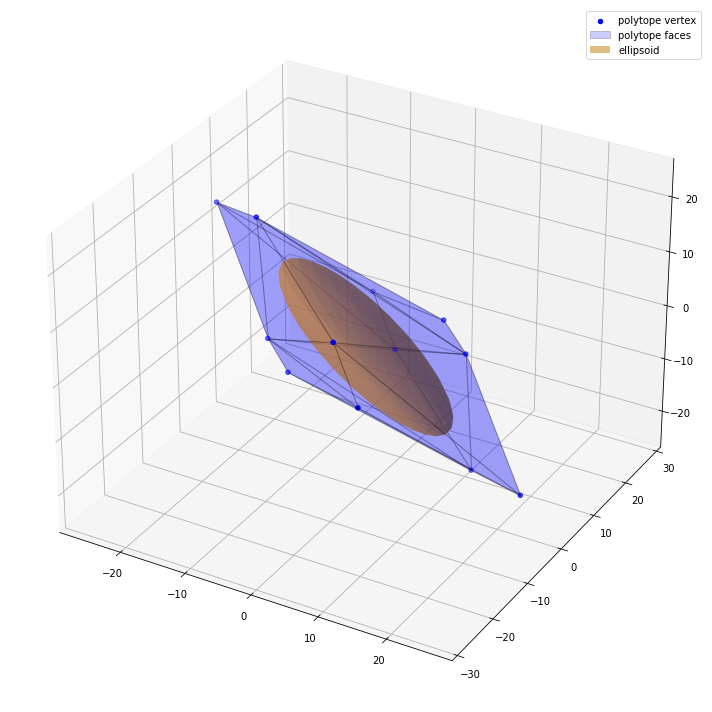

In [16]:
fig = plt.figure(2, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='black',
               vertex_color='blue',
               label='polytope',
               alpha=0.2)
    
# plot ellipsoid
plot_ellipsoid(ellipsoid=f_ellipsoid, 
               plot=fig,
               label='ellipsoid', 
               color='orange',
               alpha=0.5)

plt.tight_layout()
plt.legend()
plt.show()

## Intersection example
`m=3`
Define jacobian matrix and torque limits

In [17]:
m = 3 # 3d forces
n = 6 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [18]:
f1_poly = capacity.force_polytope(J1, t_max, t_min)
f2_poly = capacity.force_polytope(J2, t_max, t_min)
f_int_poly = capacity.force_polytope_intersection(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

Visual: no faces found, calculating faces
Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


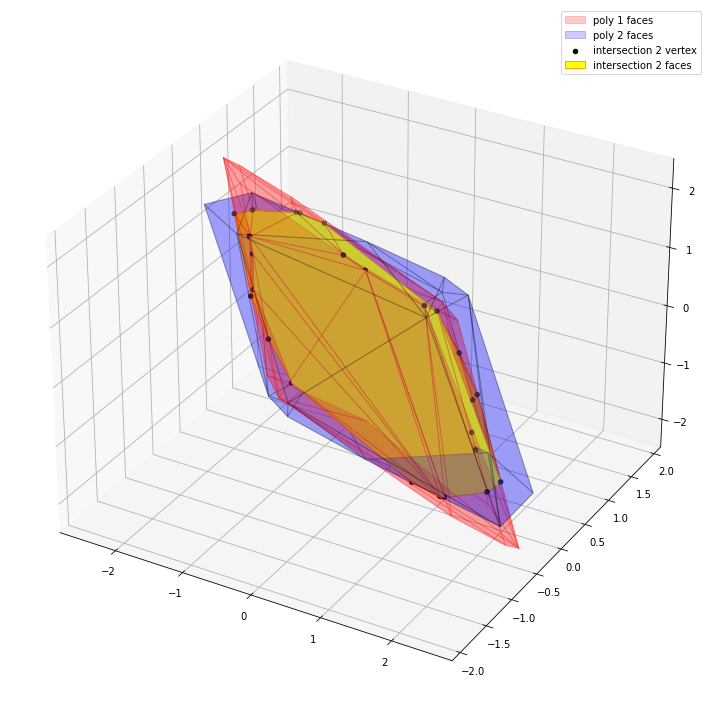

In [19]:
fig = plt.figure(2,figsize=[10,10])

# polytope1
plot_polytope(plot=fig,
               polytope=f1_poly, 
               face_color='red', 
               edge_color='red',
               label='poly 1',
               show_vertices=False,
               alpha=0.2)

# polytope2
plot_polytope(plot=fig,
               polytope=f2_poly, 
               face_color='blue', 
               edge_color='black',
               label='poly 2',
               show_vertices=False,
               alpha=0.2)

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_int_poly, 
               face_color='yellow', 
               edge_color='orange',
               vertex_color='black',
               label='intersection 2',
               alpha=1)

fig.tight_layout()
plt.legend()
plt.show()

## Minkowski sum example
`m=3`
Define jacobian matrix and torque limits

In [20]:
m = 2 # 3d forces
n = 4 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [21]:
f1_poly = capacity.force_polytope(J1, t_max, t_min)
f2_poly = capacity.force_polytope(J2, t_max, t_min)
f_int_poly = capacity.force_polytope_intersection(J1,J2,t_max,t_min,t_max,t_min)
f_sum_poly = capacity.force_polytope_sum(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

Visual: no faces found, calculating faces
Visual: no faces found, calculating faces
Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


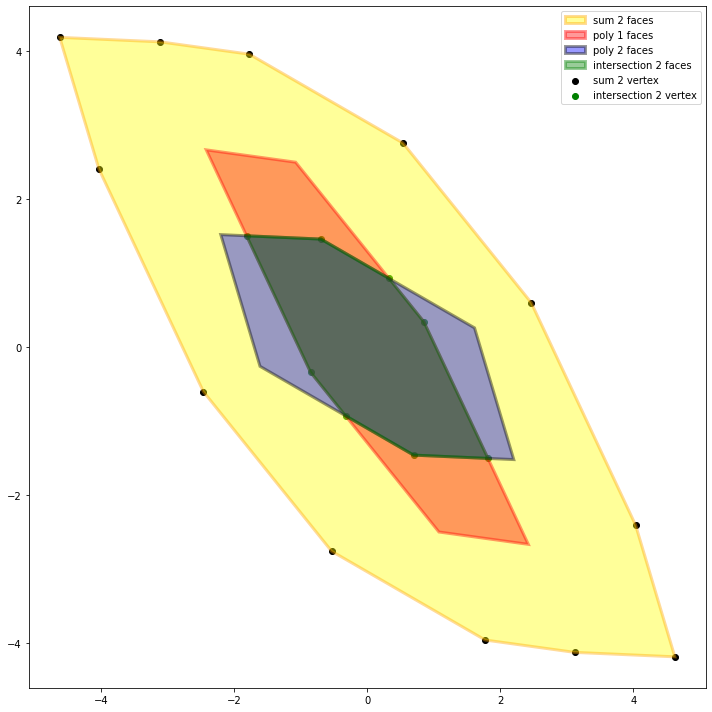

In [22]:
fig = plt.figure(2,figsize=[10,10])

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_sum_poly, 
               face_color='yellow', 
               edge_color='orange',
               vertex_color='black',
               label='sum 2',
               alpha=1)

# polytope1
plot_polytope(plot=fig,
               polytope=f1_poly, 
               face_color='red', 
               edge_color='red',
               label='poly 1',
               show_vertices=False,
               alpha=0.2)

# polytope2
plot_polytope(plot=fig,
               polytope=f2_poly, 
               face_color='blue', 
               edge_color='black',
               label='poly 2',
               show_vertices=False,
               alpha=0.2)

# intersection polytope
plot_polytope(plot=fig,
               polytope=f_int_poly, 
               face_color='green', 
               edge_color='green',
               vertex_color='green',
               label='intersection 2',
               alpha=1)


fig.tight_layout()
plt.legend()
plt.show()

# Human model polytope evaluation

A simple example program 3d force polytope 
evaluation of a randomised 30 muscle 7dof 
human musculoskeletal model 


<img src = "https://gitlab.inria.fr/auctus-team/people/antunskuric/pycapacity/-/raw/master/images/bimanual1.png" height="200px">

In [23]:
import pycapacity.human as capacity
import numpy as np

L = 30 # muscles
n = 6 # joint number - dof
m = 3 # 3d forces

J = np.array(np.random.rand(m,n))*2-1 # random jacobian matrix
N = np.array(np.random.rand(n,L))*2-1 # random moment arm matrix

F_max = 100*np.ones(L)  # muscle forces limits max and min
F_min = np.zeros(L)

dl_max = 10*np.ones(L)  # muscle contraction velocity limits max and min
dl_min = -10*np.ones(L)


dq_max = np.ones(n)  # joint velocity limits
dq_min = -np.ones(n)

# force polytope
f_poly = capacity.force_polytope(J,N, F_min, F_max, tol=10) # cal culate the polytope vertices and faces

# velocity polytope
vel_poly = capacity.velocity_polytope(J,N, 
                                      dl_min=dl_min, 
                                      dl_max = dl_max, 
                                      dq_min=dq_min, 
                                      dq_max=dq_max,
                                      tol=0.5) # cal culate the polytope vertices and faces

Visual: no faces found, calculating faces
Visual: no faces found, calculating faces


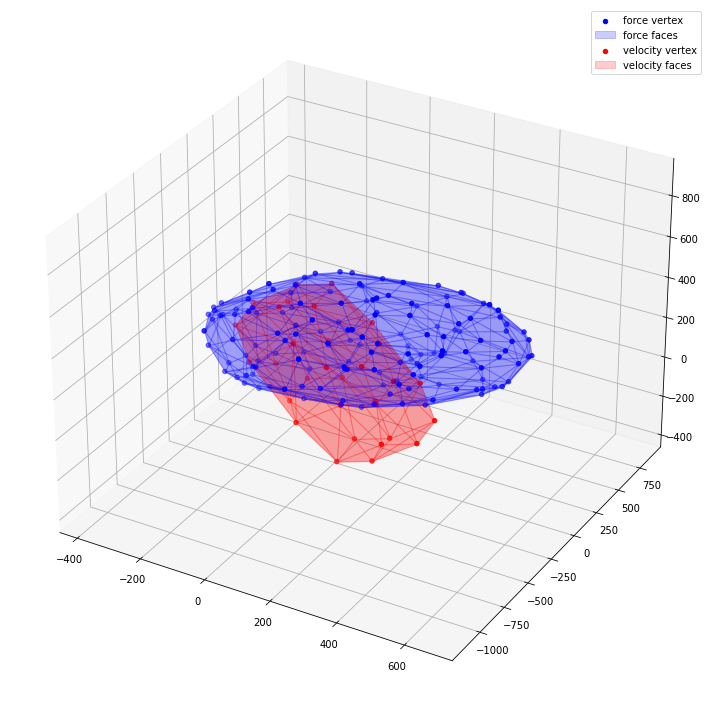

In [24]:
fig = plt.figure(4, figsize=[10,10])

# plot polytope
plot_polytope(plot=fig,
               polytope=f_poly, 
               face_color='blue', 
               edge_color='blue',
               vertex_color='blue',
               label='force',
               alpha=0.2)


# plot polytope
plot_polytope(plot=fig,
               polytope=vel_poly, 
               face_color='red', 
               edge_color='red',
               vertex_color='red',
               label='velocity',
               alpha=0.2,
               scale = 100)

plt.tight_layout()
plt.legend()